# Imports

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scsavailability as scs

In [50]:
from scsavailability import features as feat

# Questions


### Faults
* How many occur per day, how many assets are in the system (use historic data), how many assets per tote type?

6964 average faults per day
514 std
7965 max
6017 min

320 hours average
55 std
248 min
448 max

1424 Assets in Nov Data
812 Blue
387 Grey
11 Both
223 Unknown
247 Fault IDs

88 both
16 blue
145 grey

* What's our data set size (inner join) 

2020-11-18 11:00:00 - 2020-11-18 11:00:00, 4452 rows if looking at PPT level, 119 hours

* What happens dropping granularity?
* Map faults to Grey-Blue

Done

* Blue faults and availability



* Grey faults and availability



* Fault distribution by tote colour: at top level (Grey Vs. Blue), lower level (faults within colour)

247 Fault IDs

88 both (suspect 90)
16 blue
145 grey

* Faults by asset: TimeAssetIs in Fault ~ Total Availibility
* Do commonly occuring faults have a relation with time availibility? Are some faults just warnings?
* Faults by hour / shift pattern?

see plot


### Active Totes
* Active tote variability by day, hour?

Mean 52 per hour
Max 480 per hour
Min 2 per hour
std 36

* Actives by hour / shift pattern?
* Need to aggregate by hour - also is there variability within an hour?
* Correlation between active totes and availability - optimum curve
### Blue-Grey Availability data
* How does each availability vary: overall, grey, blue? Does it vary through time period
* Pick Station availability: overall, blue, grey
* Pick station availability compared to active totes: whole SCS, quadrant, module

# Data and Preprocess

In [ ]:
path = 'C:/Users/Jamie.williams/OneDrive - Newton Europe Ltd/Castle Donnington/Data/'

In [768]:
active_totes = pd.read_csv(path+'active_totes_20201123.csv')
av = pd.read_csv(path+'Availability_with_Grey&Blue_1811-2511.csv')
fa = pd.read_csv('./Data/scs_tote_matched.csv')

In [534]:
fa.head()

,Number,Alert,Entry time,PLC,Desk,Duration,Fault ID,code,PLC_number,Name,Tote Colour,_merge
0,141254,C17: C1701STA254 254B12 occupancy sensor fault,2020-01-11 00:00:00,C17,P01,0.00:00:13,3416,C1701STA254,17,NaN,Blue,left_only
1,138183,C17: C1701STA012 012B13 occupancy sensor fault,2020-01-11 00:00:00,C17,P01,0.00:00:03,3416,C1701STA012,17,NaN,Blue,left_only
2,122518,C15: C1502STA034 034B12 occupancy sensor fault,2020-01-11 00:00:00,C15,P02,0.00:00:05,3416,C1502STA034,15,NaN,Blue,left_only
3,444609,SCS M09: single module 1 emergency stop unit ...,2020-01-11 00:00:00,SCSM09,SCSM09,0.00:00:13,10408,SCSM09,0,SCSM09,Grey,both
4,139815,C17: C1701STA112 112B13 occupancy sensor fault,2020-01-11 00:00:00,C17,P01,0.00:00:08,3416,C1701STA112,17,NaN,Blue,left_only


In [857]:
fa[fa['Desk']=='Z']

,Number,Alert,Entry time,PLC,Desk,Duration,Fault ID,code,Tote Colour,Quadrant,Module
7,52405,C06: C06PTT031_ external unit fault,2020-01-11 00:00:00,C06,Z,16.0,3611,C06,Both,1,C06 External
22,76581,C09: C09PTT102_ external unit fault,2020-01-11 00:00:00,C09,Z,5.0,3611,C09,Both,2,C09 External
39,106597,C13: C13PTT171_ external unit fault,2020-01-11 00:00:00,C13,Z,8.0,3611,C13,Both,4,C13 External
43,74773,C09: C09PTT092_ external unit fault,2020-01-11 00:00:00,C09,Z,5.0,3611,C09,Both,2,C09 External
79,68405,C08: C08PTT081_ external unit fault,2020-01-11 00:00:00,C08,Z,5.0,3611,C08,Both,2,C08 External
...,...,...,...,...,...,...,...,...,...,...,...
171568,503123,C50: position undefined,2020-11-25 19:00:00,C50,Z,142.0,0,C50,Blue,0,Destacker
171569,503105,C50: Reed contact: S32 (stack clamping closed),2020-11-25 04:00:00,C50,Z,72.0,0,C50,Blue,0,Destacker
171570,503384,C52: access control light curtain,2020-11-25 01:00:00,C52,Z,27127.0,0,C52,Blue,0,Destacker
171571,503436,C52: door contact switch: S21,2020-11-25 09:00:00,C52,Z,8.0,0,C52,Blue,0,Destacker


In [339]:
av.head()

,Date,Pick Station,Availability,Blue Tote Loss,Grey Tote Loss
0,16/10/2020 06:00,PTT021,0.773749,NaN,NaN
1,16/10/2020 06:00,PTT022,0.960727,NaN,NaN
2,16/10/2020 06:00,PTT031,0.504047,NaN,NaN
3,16/10/2020 06:00,PTT032,0.185426,NaN,NaN
4,16/10/2020 06:00,PTT041,0.743447,NaN,NaN


In [340]:
active_totes.head()

,ID,MODULE_ASSIGNED,TOTES,DAY,MONTH,YEAR,HOUR,MINUTE
0,1,SCS01,44,9,11,2020,8,22
1,2,SCS02,33,9,11,2020,8,22
2,3,SCS03,71,9,11,2020,8,22
3,4,SCS04,53,9,11,2020,8,22
4,5,SCS05,65,9,11,2020,8,22


In [341]:
fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174160 entries, 0 to 174159
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Number       174160 non-null  int64 
 1   Alert        174160 non-null  object
 2   Entry time   174160 non-null  object
 3   PLC          174160 non-null  object
 4   Desk         174160 non-null  object
 5   Duration     174085 non-null  object
 6   Fault ID     174160 non-null  int64 
 7   code         174160 non-null  object
 8   PLC_number   174160 non-null  int64 
 9   Name         79765 non-null   object
 10  Tote Colour  167358 non-null  object
 11  _merge       174160 non-null  object
dtypes: int64(3), object(9)
memory usage: 15.9+ MB


In [342]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34865 entries, 0 to 34864
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            34865 non-null  object 
 1   Pick Station    34865 non-null  object 
 2   Availability    34864 non-null  float64
 3   Blue Tote Loss  6465 non-null   float64
 4   Grey Tote Loss  6465 non-null   float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


In [343]:
av.describe()

,Availability,Blue Tote Loss,Grey Tote Loss
count,34864.000000,6465.000000,6465.000000
mean,0.636028,0.231629,0.138838
std,0.208740,0.180245,0.116555
min,0.000923,0.000000,0.000000
25%,0.490404,0.074667,0.053279
50%,0.649679,0.210667,0.120923
75%,0.800880,0.358667,0.198196
max,1.000000,0.792000,0.993937


In [769]:
def pre_process(fa,av):

    #fa.rename(columns = {'Entry time ':'Entry time'},inplace = True)
    fa.columns = pd.Series(fa.columns).str.strip()
    
    av['Availability'] = 1 - av['Availability']
    av.rename(columns = {'Availability':'Downtime'},inplace = True)

    #Assign PLC code to Quadrants
    Quad_1 = ['C0' + str(i) for i in range(5,8)]  + ['SCSM0' + str(i) for i in range(1,6)]
    Quad_2 = ['C0' + str(i) for i in range(8,10)] + ['SCSM0' + str(i) for i in range(7,10)] + ['SCSM11']
    Quad_3 = ['C'  + str(i) for i in range(10,13)] + ['SCSM' + str(i) for i in range(11,16)]
    Quad_4 = ['C'  + str(i) for i in range(13,15)] + ['SCSM' + str(i) for i in range(17,21)]


    #Assign faults to Quadrants  
    Quad = []

    for i in fa['PLC']:
        if i in Quad_1:
            Quad.append(1)
        elif i in Quad_2:
            Quad.append(2)
        elif i in Quad_3:
            Quad.append(3)
        elif i in Quad_4:
            Quad.append(4)
        else:
            Quad.append(0)
    fa['Quadrant']=Quad

    #Assign Pick Station to Quadrant
    Quad_1 = ['PTT011','PTT012','PTT021','PTT022','PTT031','PTT032','PTT041','PTT042','PTT051','PTT052']
    Quad_2 = ['PTT071','PTT072','PTT081','PTT082','PTT091','PTT092','PTT101','PTT102']
    Quad_3 = ['PTT111','PTT112','PTT121','PTT122','PTT131','PTT132','PTT141','PTT142','PTT151','PTT152']
    Quad_4 = ['PTT171','PTT172','PTT181','PTT182','PTT191','PTT192','PTT201','PTT202']


    #Assign availability to Quadrants  
    Quad = []
    for i in av['Pick Station']:
        if i in Quad_1:
            Quad.append(1)
        elif i in Quad_2:
            Quad.append(2)
        elif i in Quad_3:
            Quad.append(3)
        elif i in Quad_4:
            Quad.append(4)
    av['Quadrant'] = Quad

    print('Quadrants Assigned')

    #Assign PLC code to Quadrant
    Module_1 = ['C0'  + str(i) for i in range(5,8)]  + ['SCS0' + str(i) for i in range(1,6)]
    Module_2 = ['C0' + str(i) for i in range(8,10)] + ['SCSM0' + str(i) for i in range(7,10)] + ['SCSM11']
    Module_3 = ['C'  + str(i) for i in range(10,13)] + ['SCSM' + str(i) for i in range(11,16)]
    Module_4 = ['C'  + str(i) for i in range(13,15)] + ['SCSM' + str(i) for i in range(17,21)]


    #Assign faults to Quadrants  
    Module = []

    for i in range(len(fa)):

        if fa['PLC'][i] in ['C05','SCSM01']:
            if fa['Desk'][i] != 'Z':
                Module.append('1')
            else:
                Module.append('C05 External')

        elif fa['PLC'][i] in ['C06','SCSM02','SCSM03']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM02':
                Module.append('2')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM03':
                Module.append('3') 
            else:
                Module.append('C06 External')

        elif fa['PLC'][i] in ['C07','SCSM04','SCSM05']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM04':
                Module.append('4')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM05':
                Module.append('5') 
            else:
                Module.append('C07 External')

        elif fa['PLC'][i] in ['C08','SCSM07','SCSM08']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM07':
                Module.append('7')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM08':
                Module.append('8') 
            else:
                Module.append('C08 External')

        elif fa['PLC'][i] in ['C09','SCSM09','SCSM10']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM09':
                Module.append('9')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM10':
                Module.append('10') 
            else:
                Module.append('C09 External')

        elif fa['PLC'][i] in ['C10','SCSM11']:
            if fa['Desk'][i] != 'Z':
                Module.append('11')
            else:
                Module.append('C10 External')

        elif fa['PLC'][i] in ['C11','SCSM12','SCSM13']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM12':
                Module.append('12')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM13':
                Module.append('13') 
            else:
                Module.append('C11 External')

        elif fa['PLC'][i] in ['C12','SCSM14','SCSM15']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM14':
                Module.append('14')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM15':
                Module.append('15') 
            else:
                Module.append('C12 External')

        elif fa['PLC'][i] in ['C13','SCSM17','SCSM18']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM17':
                Module.append('17')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM18':
                Module.append('18') 
            else:
                Module.append('C13 External')

        elif fa['PLC'][i] in ['C14','SCSM19','SCSM20']:
            if fa['Desk'][i] in ['P01','P02'] or fa['PLC'][i] == 'SCSM19':
                Module.append('19')
            elif fa['Desk'][i] in ['P03','P04'] or fa['PLC'][i] == 'SCSM20':
                Module.append('20') 
            else:
                Module.append('C14 External')       


        elif fa['PLC'][i] in ['C' + str(i) for i in range(35,54)]:       
            Module.append('Destacker')

        elif fa['PLC'][i] in ['C17','SCSM22']:
            Module.append('ECB')     

        elif fa['PLC'][i] in ['C15','C16','C23']:
            Module.append('Outer Loop')
        else:
            Module.append('PLC code not from SCS')

    fa['Module']=Module

    #Assign availability to Modules  

    av['Module'] = av['Pick Station'].str[3].astype(int)*10 + av['Pick Station'].str[4].astype(int).copy()

    print('Modules Assigned')
    
    fa.drop(['_merge','Name','PLC_number'],axis=1,inplace=True)

    fa['Entry time'] = pd.to_datetime(fa['Entry time'],dayfirst=True)
    av['Date'] = pd.to_datetime(av['Date'],dayfirst=True)

    #drop rows where there is no duration data
    fa = fa.dropna(subset = ['Duration'])

    #convert duration string to time delta and then to seconds (float)
    fa['Duration'] = pd.to_timedelta(fa['Duration'].str.slice(start=2))
    fa['Duration'] = fa['Duration'].dt.total_seconds()
    
    return(fa,av)

In [770]:
fa,av = pre_process(fa,av)

Quadrants Assigned
Modules Assigned


<ipython-input-769-21c3f66fbb5b>:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa['Duration'] = pd.to_timedelta(fa['Duration'].str.slice(start=2))
<ipython-input-769-21c3f66fbb5b>:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa['Duration'] = fa['Duration'].dt.total_seconds()


In [799]:
fa['Entry time'] = fa['Entry time'].dt.floor('H')
fa_fault_group = fa.groupby(['Entry time','Tote Colour','Fault ID'],as_index=False).agg({'Duration':'count'})

In [772]:
fa_piv_ID = pd.pivot_table(fa_fault_group,values = 'Duration',index = 'Entry time',columns = 'Fault ID',fill_value=0)
fa_piv_ID_blue =pd.pivot_table(fa_fault_group[fa_fault_group['Tote Colour'].isin(['Blue','Both'])],values = 'Duration',index = 'Entry time',columns = 'Fault ID',fill_value=0)
fa_piv_ID_grey =pd.pivot_table(fa_fault_group[fa_fault_group['Tote Colour'].isin(['Grey','Both'])],values = 'Duration',index = 'Entry time',columns = 'Fault ID',fill_value=0)

In [800]:
fa_fault_group_day = fa_fault_group
fa_fault_group_day['Entry time']=fa_fault_group['Entry time'].dt.hour
fa_fault_group_day = fa_fault_group_day.groupby(['Entry time','Tote Colour'],as_index=False).mean()

fa_fault_group_month = fa_fault_group
fa_fault_group_month['Entry time']=fa_fault_group['Entry time'].dt.day
fa_fault_group_month = fa_fault_group_day.groupby(['Entry time','Tote Colour'],as_index=False).mean()



In [ ]:
def pre_process_AT(active_totes):
    
    active_totes = active_totes[~active_totes['MODULE_ASSIGNED'].isin(['ECB', 'RCB'])].copy()
    
    active_totes['MODULE_ASSIGNED'] = active_totes['MODULE_ASSIGNED'].apply(lambda x: x[3:])
    
    active_totes['MODULE_ASSIGNED'] = active_totes['MODULE_ASSIGNED'].apply(pd.to_numeric)
    
    active_totes['DAY'] = active_totes['DAY'].astype('str').str.pad(width=2, side='left', fillchar='0')
    active_totes['HOUR'] = active_totes['HOUR'].astype('str').str.pad(width=2, side='left', fillchar='0')
    active_totes['MINUTE'] = active_totes['MINUTE'].astype('str').str.pad(width=2, side='left', fillchar='0')
    active_totes['timestamp'] = pd.to_datetime(active_totes.apply(
    lambda x: '{0}/{1}/{2} {3}:{4}'.format(x['MONTH'],x['DAY'], x['YEAR'], x['HOUR'], x['MINUTE']), axis=1),dayfirst=True)
    
    active_totes = active_totes.drop(['DAY','MONTH','YEAR','HOUR','MINUTE','ID'],axis=1)
    active_totes.rename(columns = {'MODULE_ASSIGNED':'Module'},inplace = True) 
        
    return active_totes


In [379]:
active_totes = pd.read_csv(path+'active_totes_20201123.csv')
active_totes_drop = pre_process_AT(active_totes)

In [380]:
active_totes_drop.head()

,Module,TOTES,timestamp
0,1,44,2020-09-11 08:22:00
1,2,33,2020-09-11 08:22:00
2,3,71,2020-09-11 08:22:00
3,4,53,2020-09-11 08:22:00
4,5,65,2020-09-11 08:22:00


In [383]:
def totes_to_hour(active_totes):
    active_totes['timestamp'] = active_totes['timestamp'].dt.floor('H')
   
    active_totes = active_totes.groupby(['Module','timestamp'],as_index=False).mean()
    return(active_totes)

In [384]:
AT_hour = totes_to_hour(active_totes_drop)

In [385]:
AT_hour.head()

,Module,timestamp,TOTES
0,1,2020-09-11 08:00:00,43.666667
1,1,2020-11-17 09:00:00,29.844828
2,1,2020-11-17 10:00:00,29.350000
3,1,2020-11-17 11:00:00,31.516667
4,1,2020-11-17 12:00:00,28.416667


In [389]:
Av_AT = pd.merge(av, AT_hour,  how='inner', left_on=['Date','Module'], right_on = ['timestamp','Module'])
Av_AT = Av_AT.drop('timestamp',axis=1)

In [390]:
Av_AT.head()

,Date,Pick Station,Downtime,Blue Tote Loss,Grey Tote Loss,Quadrant,Module,TOTES
0,2020-11-17 09:00:00,PTT011,0.543151,NaN,NaN,1,1,29.844828
1,2020-11-17 09:00:00,PTT012,0.690472,NaN,NaN,1,1,29.844828
2,2020-11-17 09:00:00,PTT021,0.256145,NaN,NaN,1,2,36.879310
3,2020-11-17 09:00:00,PTT022,0.495483,NaN,NaN,1,2,36.879310
4,2020-11-17 09:00:00,PTT031,0.414113,NaN,NaN,1,3,58.706897


In [415]:
Av_AT_complete = Av_AT[~ Av_AT['Blue Tote Loss'].isnull()].copy()
Av_AT_complete.reset_index(inplace=True)
Av_AT_complete.drop('index',axis=1,inplace=True)
#Av_AT_complete.to_csv('Availability_with_Active_Totes')

# Fault Analysis

In [696]:
def faults_day_sum(fa):
    
    fa['Entry time'] = fa['Entry time'].dt.floor('D')
    fault_day = fa.groupby('Entry time',as_index=False).sum()
    fault_day['Duration'] = fault_day['Duration'] / 3600
    fault_day.drop(['Number','Fault ID','Quadrant'],axis=1,inplace=True)
    return(fault_day)

def faults_day_count(fa):
    
    fa['Entry time'] = fa['Entry time'].dt.floor('D')
    fault_day = fa.groupby('Entry time',as_index=False).count()
    fault_day = pd.DataFrame(fault_day['Duration'])
    return(fault_day)

In [697]:
fault_by_day_count = faults_day_count(fa)
fault_by_day_count.describe()

,Duration
count,25.000000
mean,6963.400000
std,514.553366
min,6017.000000
25%,6549.000000
50%,6955.000000
75%,7169.000000
max,7965.000000


In [698]:
fault_by_day_sum = faults_day_sum(fa)
fault_by_day_sum.describe()

,Duration
count,25.000000
mean,319.986989
std,54.678188
min,248.821944
25%,278.484167
50%,309.982222
75%,332.340833
max,448.336389


In [699]:
fault_by_day_sum.head()

,Entry time,Duration
0,2020-01-11,262.626667
1,2020-02-11,273.720556
2,2020-03-11,278.484167
3,2020-04-11,267.488333
4,2020-05-11,248.821944


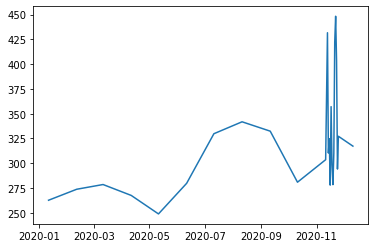

In [700]:
plt.plot(fault_by_day_sum['Entry time'],fault_by_day_sum['Duration'])

In [467]:
fa['code'].nunique()

1424

In [483]:
fa[fa['Tote Colour']=='Blue']['code'].nunique()

812

In [471]:
fa[fa['Tote Colour']=='Grey']['code'].nunique()

387

In [855]:
fa[fa['Tote Colour']=='Both']['code'].unique()

array(['C06', 'C09', 'C13', 'C08', 'C12', 'C11', 'C07', 'C14', 'C05',
       'C1002PTT112', 'C1002PTT111'], dtype=object)

In [485]:
fa[fa['Tote Colour'].isnull()]['code'].nunique()

223

In [756]:
fa['Fault ID'].nunique()

247

In [721]:
blue_IDs = fa_fault_group[fa_fault_group['Tote Colour'].isin(['Blue','Both'])]['Fault ID'].value_counts().reset_index()
blue_IDs.rename(columns = {'index':'Fault ID','Fault ID':'Count'},inplace = True)
grey_IDs = fa_fault_group[fa_fault_group['Tote Colour'].isin(['Grey','Both'])]['Fault ID'].value_counts().reset_index()
grey_IDs.rename(columns = {'index':'Fault ID','Fault ID':'Count'},inplace = True)

ID_classifier = blue_IDs.merge(grey_IDs,on='Fault ID',how='outer',indicator=True)

ID_classifier.head()

,Fault ID,Count_x,Count_y,_merge
0,3611,615.0,600.0,both
1,3416,600.0,511.0,both
2,3504,600.0,594.0,both
3,3419,600.0,568.0,both
4,3428,568.0,NaN,left_only


In [759]:
ID_classifier['_merge'].value_counts()

right_only    141
both           88
left_only      16
Name: _merge, dtype: int64

In [762]:
fa[~fa['Fault ID'].isin(ID_classifier['Fault ID'])]

,Number,Alert,Entry time,PLC,Desk,Duration,Fault ID,code,Tote Colour,Quadrant,Module
43457,118929,C14: C14+194BV81 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,3030.0,3222,C14,NaN,4,C14 External
43519,118993,C14: C14+143BV83 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43521,118897,C14: C14+186BV80 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43523,118865,C14: C14+184BV79 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43525,118833,C14: C14+173BV78 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43527,118801,C14: C14+163BV77 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43529,118769,C14: C14+156BV76 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43531,118737,C14: C14+150BV75 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43533,118705,C14: C14+140BV74 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External
43535,118673,C14: C14+130BV73 circuit breaker monitoring 24VDC,2020-07-11,C14,Z,1.0,3222,C14,NaN,4,C14 External


In [809]:
fa_fault_group_day.head(3)

,Entry time,Tote Colour,Fault ID,Duration
0,0,Blue,3904.605016,10.347962
1,0,Both,3611.000000,72.200000
2,0,Grey,6102.672973,3.845946


Text(0.5, 1.0, 'Fault Distrubtion Across the Day')

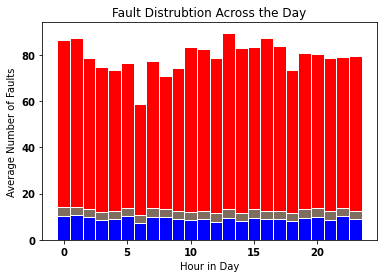

In [845]:
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
Blue = fa_fault_group_day[fa_fault_group_day['Tote Colour']=='Blue']['Duration']
Grey = fa_fault_group_day[fa_fault_group_day['Tote Colour']=='Grey']['Duration']
Both = fa_fault_group_day[fa_fault_group_day['Tote Colour']=='Both']['Duration']
 
# Heights of bars1 + bars2
bars = np.add(Blue.reset_index(drop=True), Grey.reset_index(drop=True)).tolist()

# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
 
# Names of group and bar width
names = fa_fault_group_day['Entry time'].unique
barWidth = 1
 
# Create brown bars
plt.bar(r, Blue, color='b', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, Grey, bottom=Blue, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, Both, bottom=bars, color='red', edgecolor='white', width=barWidth)

plt.xlabel('Hour in Day')
plt.ylabel('Average Number of Faults')
plt.title('Fault Distrubtion Across the Day')

# Availability Analysis

In [879]:
AV_AT_complete_Mod = Av_AT_complete.groupby(['Module'],as_index=False).mean().sort_values('TOTES',ascending=False)

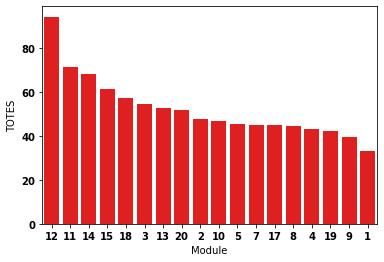

In [888]:
sns.barplot(data=AV_AT_complete_Mod,x='Module',y='TOTES',color='r',order = AV_AT_complete_Mod.sort_values('TOTES',ascending=False).Module)

In [492]:
Av_AT_complete.describe()

,Downtime,Blue Tote Loss,Grey Tote Loss,Quadrant,Module,TOTES
count,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000
mean,0.381302,0.234056,0.147245,2.443396,10.440027,52.371998
std,0.198435,0.184226,0.122420,1.117128,5.845556,35.914778
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.480000
25%,0.233793,0.073333,0.059372,1.000000,5.000000,32.433333
50%,0.365998,0.212000,0.128433,2.000000,10.000000,44.350000
75%,0.504534,0.361333,0.208182,3.000000,15.000000,61.004167
max,0.993937,0.792000,0.993937,4.000000,20.000000,481.100000


In [870]:
Av_AT_complete_Quad = Av_AT_complete.groupby(['Quadrant'],as_index=False).mean()

([<matplotlib.axis.XTick at 0x21935ffee20>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')])

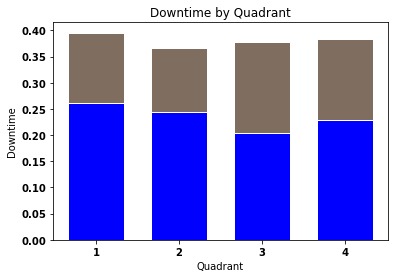

In [874]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
Blue = Av_AT_complete_Quad['Blue Tote Loss']
Grey = Av_AT_complete_Quad['Grey Tote Loss']


# The position of the bars on the x-axis
r = [1,2.5,4,5.5]
 
# Names of group and bar width
names = Av_AT_complete_Quad['Quadrant']
barWidth = 1
 
# Create brown bars
plt.bar(r, Blue, color='b', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, Grey, bottom=Blue, color='#7f6d5f', edgecolor='white', width=barWidth)

plt.xlabel('Quadrant')
plt.ylabel('Downtime')
plt.title('Downtime by Quadrant')
plt.xticks(r, names, fontweight='bold')


In [499]:
Av_AT_complete.head()

,Date,Pick Station,Downtime,Blue Tote Loss,Grey Tote Loss,Quadrant,Module,TOTES
0,2020-11-18 11:00:00,PTT011,0.641579,0.480000,0.161579,1,1,28.833333
1,2020-11-18 11:00:00,PTT012,0.557410,0.532000,0.025410,1,1,28.833333
2,2020-11-18 11:00:00,PTT021,0.190814,0.164000,0.026814,1,2,47.133333
3,2020-11-18 11:00:00,PTT022,0.264626,0.138667,0.125959,1,2,47.133333
4,2020-11-18 11:00:00,PTT031,0.125126,0.000000,0.125126,1,3,71.300000


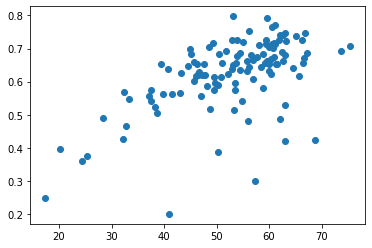

In [508]:
plt.scatter(y=1-Av_Quad['Downtime'],x=Av_Quad['TOTES'])

In [509]:
Av_AT_complete['TOTES'] = Av_AT_complete['TOTES'].round()

In [892]:
AV_byTote = Av_AT_complete.groupby('TOTES').agg({'Downtime':np.mean,'Blue Tote Loss':np.mean,'Grey Tote Loss':np.mean}).reset_index()

In [893]:
AV_byTote.head()

,TOTES,Downtime,Blue Tote Loss,Grey Tote Loss
0,2.0,0.944880,0.582128,0.362752
1,3.0,0.866572,0.623830,0.242742
2,4.0,0.812949,0.558908,0.254041
3,5.0,0.871960,0.588511,0.283450
4,6.0,0.269677,0.246121,0.023556


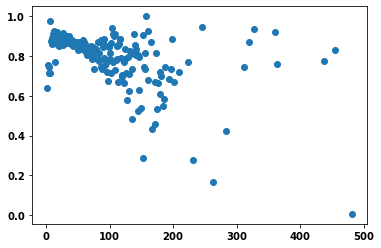

In [897]:
plt.scatter(x=AV_byTote['TOTES'],y=1-AV_byTote['Grey Tote Loss'])

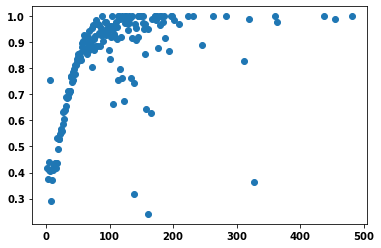

In [898]:
plt.scatter(x=AV_byTote['TOTES'],y=1-AV_byTote['Blue Tote Loss'])

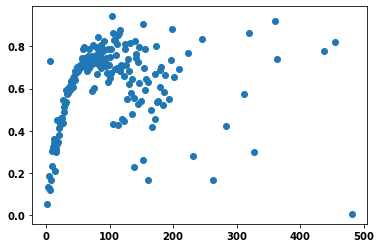

In [899]:
plt.scatter(x=AV_byTote['TOTES'],y=1-AV_byTote['Downtime'])